In [0]:
%matplotlib inline

import io
import numpy as np
import pandas as pd

from google.colab import files

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, plot_confusion_matrix

from matplotlib import pyplot as plt

In [0]:
seed = 42
np.random.seed(seed=seed)

In [6]:
uploaded = files.upload()

Saving iris.csv to iris.csv


In [0]:
df = pd.read_csv(io.BytesIO(uploaded['iris.csv']), sep=',', encoding='utf-8')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
target               150 non-null int64
target_name          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [9]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [10]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [0]:
x = df.iloc[:, :4].values
y = df['target'].values

In [0]:
xtr, xte, ytr, yte = train_test_split(
    x,
    y,
    test_size=0.33,
    random_state=seed,
    shuffle=True,
    stratify=y
)

In [13]:
print('Train X: ', xtr.shape)
print('Test X: ', xte.shape)
print('Train Y: ', ytr.shape)
print('Test Y: ', yte.shape)

Train X:  (100, 4)
Test X:  (50, 4)
Train Y:  (100,)
Test Y:  (50,)


In [0]:
knn = KNeighborsClassifier(
    n_neighbors=15,
    weights='distance',
    n_jobs=-1
)

In [15]:
knn.fit(
    X=xtr,
    y=ytr
)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=15, p=2,
                     weights='distance')

In [16]:
print('Accuracy: ', knn.score(xte, yte))

Accuracy:  0.96


In [0]:
pred = knn.predict(xte)

In [0]:
pca = PCA(n_components=2)
pca.fit(x)
xpc = pca.transform(xte)

In [0]:
plt.rcParams['figure.figsize'] = [16, 8]

Text(0.5, 1.0, 'Y Predicted')

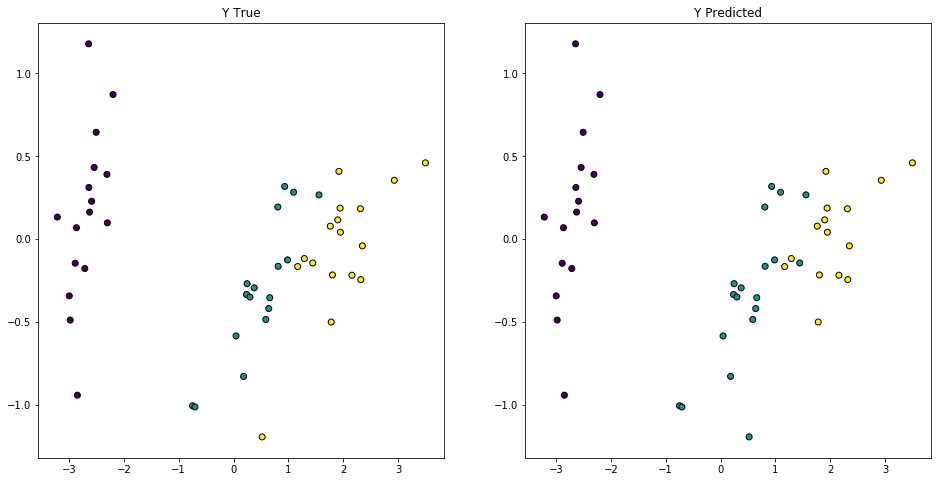

In [20]:
plt.subplot(1, 2, 1)
plt.scatter(xpc[:, 0], xpc[:, 1], c=yte, edgecolors='k')
plt.title('Y True')
plt.subplot(1, 2, 2)
plt.scatter(xpc[:, 0], xpc[:, 1], c=pred, edgecolors='k')
plt.title('Y Predicted')

<Figure size 1152x576 with 0 Axes>

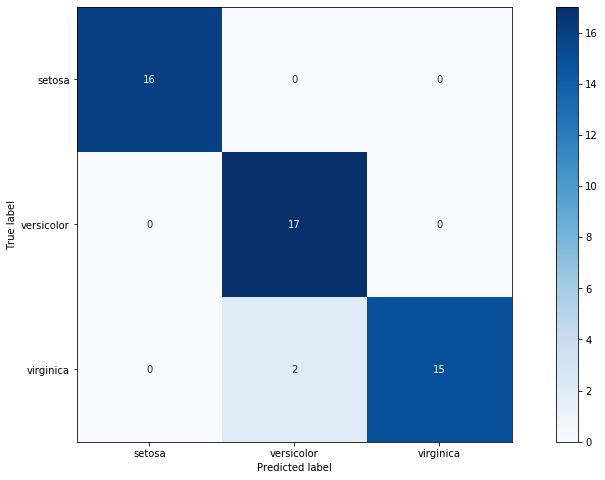

In [21]:
plt.figure()
plot_confusion_matrix(
    knn,
    xte,
    yte,
    display_labels=['setosa', 'versicolor', 'virginica'],
    cmap=plt.cm.Blues
)
plt.show()

In [22]:
print(classification_report(yte, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.89      1.00      0.94        17
           2       1.00      0.88      0.94        17

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50

